In [14]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt
from datetime import timedelta

In [15]:
datafile = "C:\\Users\\ofekd\\Desktop\\שנה ג תעשייה וניהול\\כריה וניתוח בפייתון\\מטלות\\matala2\\matala2_cosmetics_2019-Nov.csv"

In [16]:
data = pd.read_csv(datafile)

data.head()

C:\Users\ofekd\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02,view,5802432,1487580009286590000,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09,cart,5844397,1487580006317030000,NaN,NaN,2.38 sale,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10,view,5837166,1783999064103190000,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11,cart,5876812,1487580010100290000,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483040000,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


# Q1

In [13]:
data['event_time'] = pd.to_datetime(data['event_time'])
data['duration_to_next_event'] = abs((data.groupby('user_session')['event_time'].shift(-1) - data['event_time']).dt.seconds.fillna(0))
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0


# Q2

In [317]:
data = data.sort_values(['user_id', 'event_time'])
data['days_diff'] = data.groupby('user_id')['event_time'].diff().dt.days
new = data['days_diff'] > 5

data['funnel_number'] = new.groupby(data['user_id']).cumsum() + 1
data['funnel_number'] = data['funnel_number'].fillna(0)
data
#data = data.drop(columns=['days_diff'])

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel,days_diff
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,155497.0,1,1,NaN
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0,1,1,NaN
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0,1,2,0.0
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,1,3,0.0
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,229796.0,1,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048392,2019-11-08 11:16:28,view,5861591,1487580009143990000,NaN,lador,2.22,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,5.0,1,1,NaN
1048385,2019-11-08 11:16:23,view,5799891,1487580009051710000,NaN,NaN,19.03,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,32.0,1,1,NaN
1048471,2019-11-08 11:16:55,view,5881598,2151191071051210000,NaN,lovely,12.56,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,2.0,1,1,NaN
1048462,2019-11-08 11:16:53,view,5876382,1487580008246410000,NaN,NaN,23.81,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,28.0,1,1,NaN


# Q3

In [302]:
data = data.sort_values(['user_id', 'funnel_number', 'event_time'])
data['temp'] = data.groupby(['user_id', 'funnel_number', 'user_session'])['user_session'].shift().ne(0).astype(int)


In [303]:
data['index_in_funnel'] = data.groupby(['user_id' , 'funnel_number'])['temp'].cumsum()
data = data.drop(columns=['temp'])
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,155497.0,1,1
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0,1,1
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0,1,2
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,1,3
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,-229796.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1048392,2019-11-08 11:16:28,view,5861591,1487580009143990000,NaN,lador,2.22,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,-5.0,1,1
1048385,2019-11-08 11:16:23,view,5799891,1487580009051710000,NaN,NaN,19.03,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,32.0,1,1
1048471,2019-11-08 11:16:55,view,5881598,2151191071051210000,NaN,lovely,12.56,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,-2.0,1,1
1048462,2019-11-08 11:16:53,view,5876382,1487580008246410000,NaN,NaN,23.81,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,28.0,1,1


In [304]:
#data['funnel_number'].value_counts()

# Q4

In [305]:
data['price'] = data['price'].apply(lambda x: float(re.findall(r'\d+\.\d+', x)[0]) if isinstance(x, str) else x)
data


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,155497.0,1,1
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0,1,1
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0,1,2
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,1,3
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,-229796.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1048392,2019-11-08 11:16:28,view,5861591,1487580009143990000,NaN,lador,2.22,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,-5.0,1,1
1048385,2019-11-08 11:16:23,view,5799891,1487580009051710000,NaN,NaN,19.03,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,32.0,1,1
1048471,2019-11-08 11:16:55,view,5881598,2151191071051210000,NaN,lovely,12.56,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,-2.0,1,1
1048462,2019-11-08 11:16:53,view,5876382,1487580008246410000,NaN,NaN,23.81,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,28.0,1,1


In [306]:
#print(data['price'].dtype)


# Q5

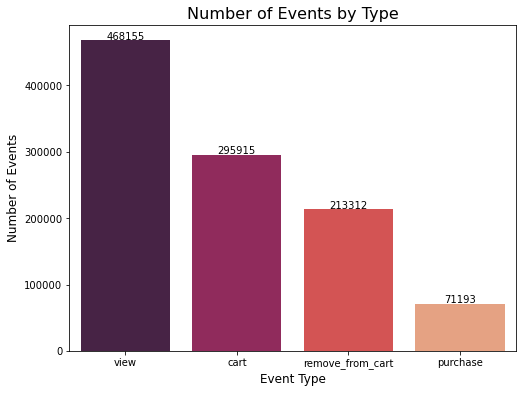

In [307]:
event_counts = data['event_type'].value_counts()

#the plot
plt.figure(figsize=(8, 6))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='rocket')

for index, value in enumerate(event_counts.values):
    plt.text(index, value+1000, str(value), ha='center')

#title
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.title('Number of Events by Type', fontsize=16)

plt.show()


# Q6

In [316]:
new_data = data[['user_id','user_session','funnel_number','index_in_funnel']].copy()

new_data['num_of_events'] = data.groupby('user_session')[['event_type']].transform('count')
new_data['visit_duration'] = data.groupby(['funnel_number', 'user_session'])[["duration_to_next_event"]].transform('sum')

events_by_session = data.groupby(['user_id', 'user_session']).apply(
    lambda x: pd.Series({
        'list_of_viewed': list(x.loc[x['event_type'] == 'view', 'product_id']),
        'list_of_added_to_cart': list(x.loc[x['event_type'] == 'cart', 'product_id']),
        'list_of_purchased': list(x.loc[x['event_type'] == 'purchase', 'product_id'])
    })
).reset_index()

session_data = pd.merge(new_data, events_by_session , how = 'left', on = ['user_id', 'user_session'])
session_data.head()


,user_id,user_session,funnel_number,index_in_funnel,num_of_events,visit_duration,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,155497.0,[5240],[],[]
1,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,1,1,4.0,229972.0,[],"[5614842, 5766379]","[5766379, 5614842]"
2,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,1,2,4.0,229972.0,[],"[5614842, 5766379]","[5766379, 5614842]"
3,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,1,3,4.0,229972.0,[],"[5614842, 5766379]","[5766379, 5614842]"
4,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,1,4,4.0,229972.0,[],"[5614842, 5766379]","[5766379, 5614842]"
